<a href="https://colab.research.google.com/github/Daegil2/practice/blob/main/0823_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt



In [4]:
fashion_mnist =keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data() #학습셋과 평가셋 분리해서 로드
is_nomalized=False # 0부터 255 사이값을 255로 나누어 0과 1사이 값으로 정규화했는지 여부

4431872/4422102 [==============================] - 0s 0us/step


Training set의 이미지 개수: 60000
Test set의 이미지 개수: 10000
이미지 크기: 28 X 28
정답값 예시: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]
이미지 값 예시: 
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 24

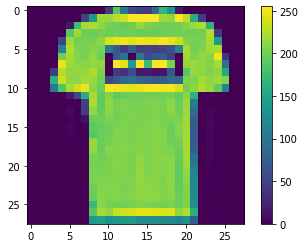

In [5]:
print("Training set의 이미지 개수: %d" %train_images.shape[0])
print("Test set의 이미지 개수: %d" %test_images.shape[0])
print("이미지 크기: %d X %d" %(train_images.shape[1], train_images.shape[2]))
print("정답값 예시: %s" %str(train_labels[:20]))
print("이미지 값 예시: \n%s" %str(train_images[1]))
plt.figure() # 그림 입력 준비
plt.imshow(train_images[1]) # 데이터 입력
plt.colorbar() # 우측 컬러바
plt.show() # 이미지 출력


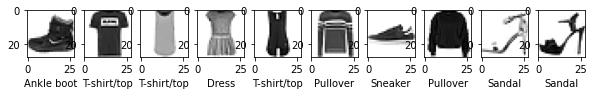

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10)) #그림크기 10x10
for i in range(10):
  plt.subplot(1,10,i+1) # 그림위치 25개중 i+1 번째
  plt.grid(False) #격자off
  plt.imshow(train_images[i], cmap=plt.cm.binary) #학습셋의 i번째 샘플 이미지 입력. cmap(컬러맵) binary(회색조)
  plt.xlabel(class_names[train_labels[i]]) # 학습셋의 샘플 정답 인덱스 = train_labels[i]. class_names는 인덱스를 클래스 명으로 변환
plt.show()

In [7]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer ='adam',
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy :다중분류 손실 함수,sparse 
              metrics=['accuracy'])

In [9]:
history =model.fit(train_images,
         train_labels,
         epochs=10,
         validation_data=(test_images, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 16.5794 - accuracy: 0.7463 - val_loss: 11.8304 - val_accuracy: 0.7975
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 12.0805 - accuracy: 0.7893 - val_loss: 15.8673 - val_accuracy: 0.7641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 11.7397 - accuracy: 0.7947 - val_loss: 11.3311 - val_accuracy: 0.7918
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.4888 - accuracy: 0.8020 - val_loss: 12.8561 - val_accuracy: 0.7845
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.7814 - accuracy: 0.8007 - val_loss: 10.6610 - val_accuracy: 0.7832
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.2909 - accuracy: 0.8046 - val_loss: 10.4634 - val_accuracy: 0.7965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 10.2894 - accuracy: 0.8051 - val_loss: 10.6486 -

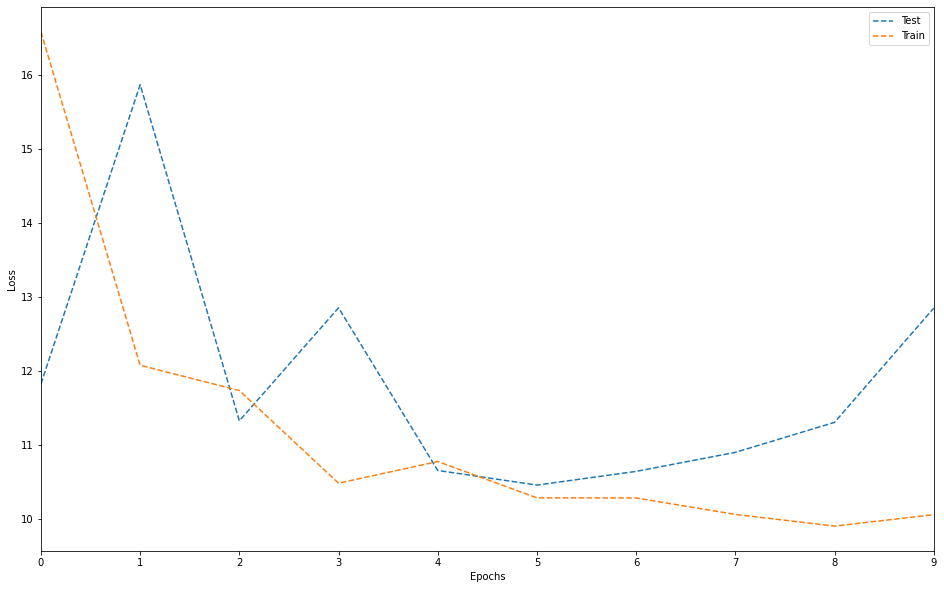

In [10]:
def plot_loss(history):
  plt.figure(figsize=(16,10))
  plt.plot(history.epoch, history.history['val_loss'],'--', label='Test')
  plt.plot(history.epoch, history.history['loss'],'--', label='Train')

  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.legend()
  plt.xlim([0,max(history.epoch)])
plot_loss(history)

In [11]:
def eval_model(model):
  test_loss, test_acc =model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_acc)

eval_model(model)

313/313 [==============================] - 0s 2ms/step - loss: 12.8521 - accuracy: 0.7737
Test accuracy: 0.7736999988555908


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 평탄화
    keras.layers.Dense(512, activation=tf.nn.tanh), # 784 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9459 - accuracy: 0.6284 - val_loss: 0.9340 - val_accuracy: 0.6298
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8952 - accuracy: 0.6467 - val_loss: 1.0099 - val_accuracy: 0.5510
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8717 - accuracy: 0.6553 - val_loss: 0.8627 - val_accuracy: 0.6427
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8584 - accuracy: 0.6663 - val_loss: 0.8728 - val_accuracy: 0.6481
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8049 - accuracy: 0.6888 - val_loss: 0.8305 - val_accuracy: 0.6944
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7912 - accuracy: 0.6916 - val_loss: 0.7949 - val_accuracy: 0.6890
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7658 - accuracy: 0.7087 - val_loss: 0.7942 - val_accuracy:

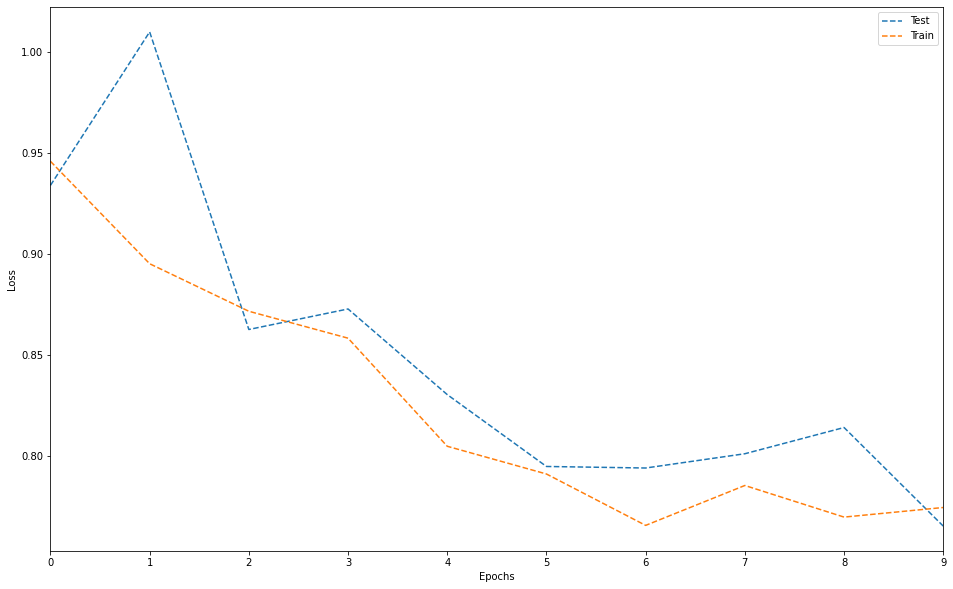

In [13]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images, # 학습셋 이미지
          train_labels, # 학습셋 레이블
          epochs=10, # 에폭
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

plot_loss(history) # 저장된 history를 입력해 loss 변화 출력
eval_model(model) # model 평가


In [ ]:
def plot_loss(history):
  plt.figure(figsize=(16,10))
  plt.plot(history.epoch, history.history['val_loss'],'--', label='Test')
  plt.plot(history.epoch, history.history['loss'],'--', label='Train')

  plt.xlabel('Epochs')
  plt.ylabel("Loss")
  plt.legend()
  plt.xlim([0,max(history.epoch)])
plot_loss(history)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.tanh), # 784 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(512, activation=tf.nn.tanh), # 512 -> 512. 활성함수는 tanh
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0007 - accuracy: 0.2345 - val_loss: 2.3366 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3581 - accuracy: 0.1008 - val_loss: 2.3445 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3636 - accuracy: 0.0984 - val_loss: 2.4407 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3599 - accuracy: 0.1002 - val_loss: 2.3586 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3632 - accuracy: 0.0990 - val_loss: 2.3322 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3619 - accuracy: 0.1003 - val_loss: 2.3213 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3619 - accuracy: 0.1015 - val_loss: 2.3464 - val_accuracy:

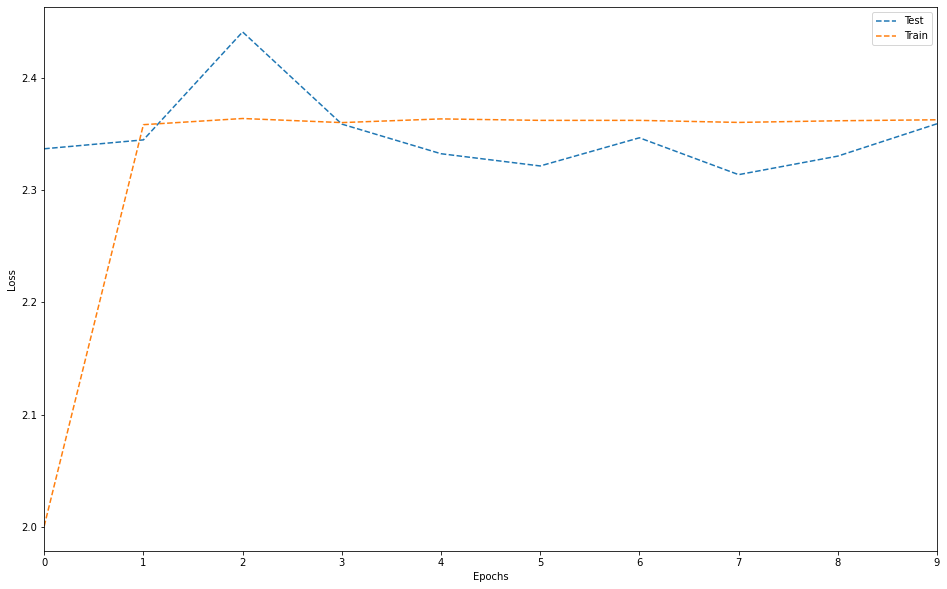

In [16]:
model.compile(optimizer='adam', # adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images, # 학습셋의 이미지
          train_labels, # 학습셋의 레이블
          epochs=10, # 에폭 = 10
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

plot_loss(history) # 기록된 history를 출력
eval_model(model) # 모델을 평가


In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 Relu
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6618 - accuracy: 0.7888 - val_loss: 0.5752 - val_accuracy: 0.8101
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4674 - accuracy: 0.8398 - val_loss: 0.4946 - val_accuracy: 0.8173
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4477 - accuracy: 0.8480 - val_loss: 0.4605 - val_accuracy: 0.8436
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4111 - accuracy: 0.8599 - val_loss: 0.4662 - val_accuracy: 0.8433
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4066 - accuracy: 0.8613 - val_loss: 0.4440 - val_accuracy: 0.8474
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3982 - accuracy: 0.8660 - val_loss: 0.4082 - val_accuracy: 0.8537
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3783 - accuracy: 0.8703 - val_loss: 0.4372 - val_accuracy:

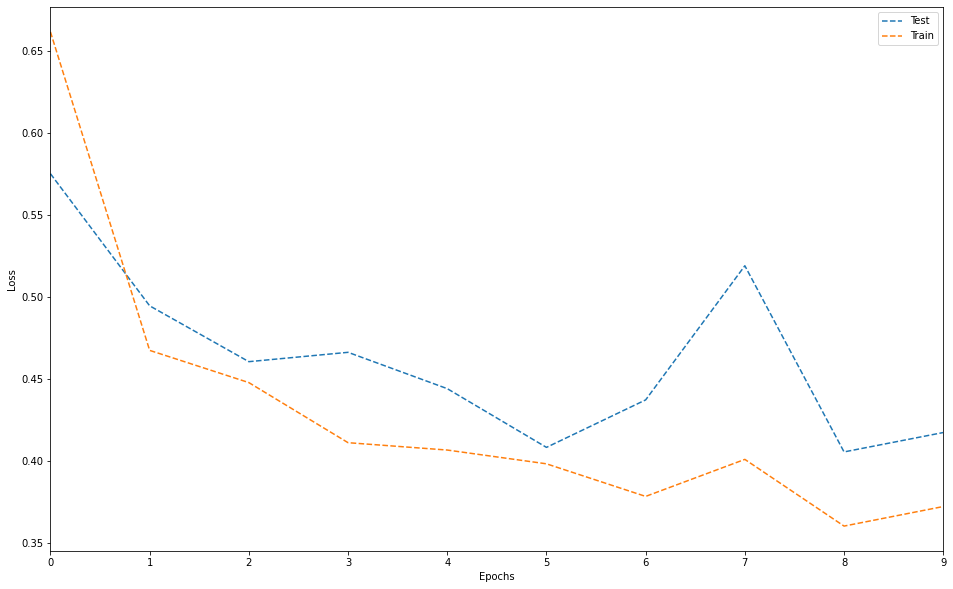

In [18]:
model.compile(optimizer='adam', # Adam Optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images, # 학습셋 이미지
          train_labels, # 학습셋 레이블
          epochs=10, # 에폭 = 10
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )

plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 모델 평가


In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # (28,28) 크기의 입력을 784로 평탄화
    keras.layers.Dense(512, activation=tf.nn.relu), # 784 -> 512. 활성함수는 relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dense(512, activation=tf.nn.relu), # 512 -> 512. 활성함수는 relu
    keras.layers.Dense(10, activation=tf.nn.softmax) # 512 -> 10. softmax로 확률값 반환
])


In [20]:
model.compile(optimizer='adam', # Adam optimizer
              loss='sparse_categorical_crossentropy', # categorical_crossentropy: 다중 분류 손실함수. sparse: integer type 클래스로 one-hot encoding 과정을 하지 않아도 된다.
              metrics=['accuracy']) # 정확도로 평가

history = model.fit(train_images[:2000], # 학습 데이터 2000개
          train_labels[:2000], # 학습 레이블 2000개
          epochs=30, # 에폭 = 30
          validation_data=(test_images, test_labels) # 평가셋으로 검증
         )


Epoch 1/30
63/63 [==============================] - 1s 12ms/step - loss: 15.1480 - accuracy: 0.5580 - val_loss: 2.2929 - val_accuracy: 0.6583
Epoch 2/30
63/63 [==============================] - 1s 13ms/step - loss: 1.0027 - accuracy: 0.7470 - val_loss: 1.0738 - val_accuracy: 0.7338
Epoch 3/30
63/63 [==============================] - 1s 13ms/step - loss: 0.6321 - accuracy: 0.8100 - val_loss: 0.8445 - val_accuracy: 0.7589
Epoch 4/30
63/63 [==============================] - 1s 13ms/step - loss: 0.5404 - accuracy: 0.8240 - val_loss: 0.9166 - val_accuracy: 0.7459
Epoch 5/30
63/63 [==============================] - 1s 10ms/step - loss: 0.4204 - accuracy: 0.8640 - val_loss: 0.7484 - val_accuracy: 0.7826
Epoch 6/30
63/63 [==============================] - 1s 13ms/step - loss: 0.3779 - accuracy: 0.8620 - val_loss: 1.0271 - val_accuracy: 0.7425
Epoch 7/30
63/63 [==============================] - 1s 13ms/step - loss: 0.3792 - accuracy: 0.8770 - val_loss: 0.8367 - val_accuracy: 0.7526
Epoch 8/30
6

313/313 [==============================] - 1s 2ms/step - loss: 1.0094 - accuracy: 0.7766
Test accuracy: 0.7766000032424927


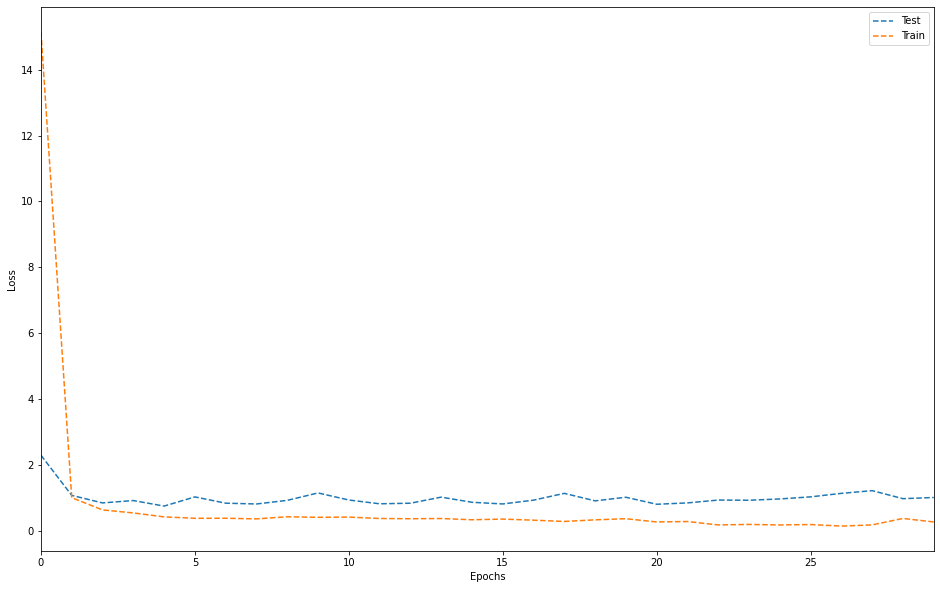

In [21]:
plot_loss(history) # 기록된 history로 loss 출력
eval_model(model) # 학습된 model 평가
